16th     Logistic Regression Mnist

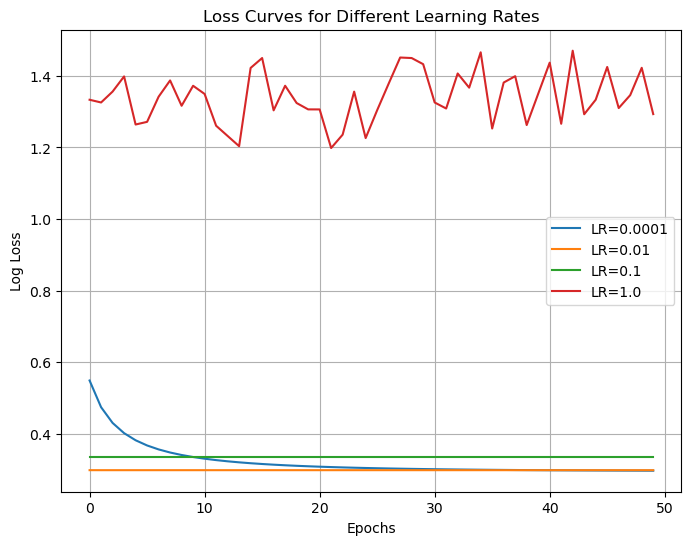

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Learning rates to test
learning_rates = [0.0001, 0.01, 0.1, 1.0]

# Train logistic regression models with different learning rates
loss_curves = {}
for lr in learning_rates:
    model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=lr, max_iter=1, random_state=42, tol=None)
    losses = []

    for _ in range(50):  # Train for 50 epochs
        model.partial_fit(X_train, y_train, classes=np.unique(y))
        y_pred_proba = model.predict_proba(X_train)[:, 1]
        loss = log_loss(y_train, y_pred_proba)
        losses.append(loss)

    loss_curves[lr] = losses

# Plot loss curves
plt.figure(figsize=(8, 6))
for lr, losses in loss_curves.items():
    plt.plot(losses, label=f"LR={lr}")

plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Loss Curves for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()
